### NAME: BÙI PHƯƠNG THẢO
### ID: 11215341
### CLASS: DSEB63

In [210]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

#### PROBLEM 2: Implement logistic regression algorithm from scratch. You can use Gradient Descent or Newton Raphson as optimization method for loss function. Note that your implementation should follow an OOP form.

In [217]:
def them_cot_mot(x):
    if len(x.shape) == 1:
        x_1 = np.hstack((np.ones(x.reshape(-1,1).shape[1]),x))
    else:
        x_1 = np.hstack((np.ones((x.shape[0],1)),x))
    return x_1

def sigmoid(z): #clip để tránh overflow ?
    return 1/(1 + np.exp(-z))

In [218]:
class Logistic:
    def __init__(self):
        self.x = None
        self.y = None
        self.w = None
    
    def fit(self,x, y):
        learning_rate = 0.01
        self.x = them_cot_mot(x)
        self.w = np.zeros(self.x.shape[1])
        itera = 1000
        self.y = y
        for i in range(1,itera):
            y_pred = sigmoid(np.dot(self.x,self.w))
            gradient = np.dot(self.x.T,(y_pred - self.y))
            self.w = self.w - learning_rate * gradient
        return self.w
    
    def predict(self,x):
        x = them_cot_mot(x)
        xTw = np.dot(x,self.w)
        if sigmoid(xTw) >= 0.5:
            return 1
        else:
            return 0
    
    def plot(self):
        plt.scatter(self.x[self.y == 0,1], self.x[self.y == 0, 2], c = 'blue', label = 'y = 0')
        plt.scatter(self.x[self.y == 1,1], self.x[self.y == 1, 2], c = 'red', label = 'y = 1')
        plt.legend()
        plt.xlabel('x_1')
        plt.ylabel('x_2')
        
        #decision boundary
        xkeke = np.arange(np.min(self.x[:,1]),np.max(self.x[:,1]), 0.01)
        ykeke = - ((self.w[0]/self.w[2]) + ((self.w[1]/self.w[2]) * xkeke))
        plt.plot(xkeke,ykeke, c = 'green')
        plt.show()

In [219]:
data = pd.read_csv(r"C:\Users\KyThuat88\Downloads\ds1_train.csv")
data

,x_1,x_2,y
0,2.911809,60.359613,0.0
1,3.774746,344.149284,0.0
2,2.615488,178.222087,0.0
3,2.013694,15.259472,0.0
4,2.757625,66.194174,0.0
...,...,...,...
795,3.724697,23.219963,1.0
796,3.139055,5.970538,1.0
797,2.969095,20.249978,1.0
798,3.957531,27.261970,1.0


In [220]:
check = Logistic()
x = np.array(data.iloc[:,:-1])
y = np.array(data.iloc[:,-1])

In [209]:
x.shape

(800, 2)

In [221]:
w = check.fit(x,y)
w

C:\Users\KyThuat88\AppData\Local\Temp\ipykernel_8956\1610279779.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


array([   8.03225601, 2203.58034901,  -93.02132811])

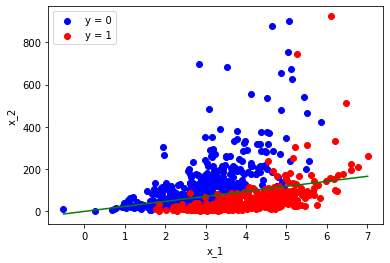

In [222]:
check.plot()

In [225]:
val_data = pd.read_csv(r"C:\Users\KyThuat88\Downloads\ds1_valid.csv")
val_data

,x_1,x_2,y
0,2.177396,78.630076,0.0
1,3.952131,123.541573,0.0
2,3.351176,47.752517,0.0
3,2.074934,26.997730,0.0
4,3.579775,226.703779,0.0
...,...,...,...
95,3.795618,11.708285,1.0
96,3.953480,7.320390,1.0
97,3.863524,26.396698,1.0
98,4.917294,102.078713,1.0


In [226]:
x_val = np.array(val_data.iloc[:,:-1])
y_val = np.array(val_data.iloc[:,-1])

In [231]:
len(x_val)

100

In [235]:
y_predict = np.array([check.predict(x_val[i]) for i in range(0,len(x_val))])
#y_predict

C:\Users\KyThuat88\AppData\Local\Temp\ipykernel_8956\1610279779.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


array([0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0,
       0, 1, 1, 0, 0, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

In [236]:
len(y_predict)

100

In [237]:
from sklearn.metrics import accuracy_score
print(accuracy_score(y_val, y_predict))

0.76


In [238]:
vall = Logistic()

C:\Users\KyThuat88\AppData\Local\Temp\ipykernel_8956\1610279779.py:9: RuntimeWarning: overflow encountered in exp
  return 1/(1 + np.exp(-z))


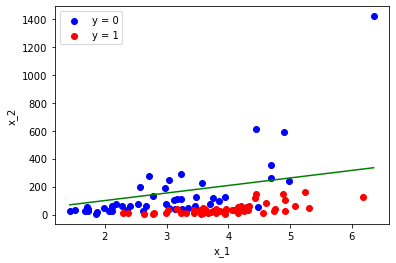

In [239]:
vall.fit(x_val,y_val)
vall.plot()

In [246]:
test = np.array(([[1,2,3,4,5,6],[7,8,9,0,0,0],[1,1,1,1,1,1]])).reshape(-1,3)
test

array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9],
       [0, 0, 0],
       [1, 1, 1],
       [1, 1, 1]])

In [247]:
test.shape

(6, 3)

In [249]:
test[0].shape

(3,)

In [250]:
them_cot_mot(test)

array([[1., 1., 2., 3.],
       [1., 4., 5., 6.],
       [1., 7., 8., 9.],
       [1., 0., 0., 0.],
       [1., 1., 1., 1.],
       [1., 1., 1., 1.]])

In [251]:
them_cot_mot(test[0])

array([1., 1., 2., 3.])